In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from thunder import KMeans, PCA, RegressionModel, Colorize
import numpy as np
from numpy import amin, amax, ravel, sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
image = Colorize.image
sns.set_context('notebook')
sns.set_style('ticks')
plt.ioff()

def center(m):
    y = m.copy()
    y[y>0] = y[y>0]/max(y[y>0])
    y[y<0] = y[y<0]/-min(y[y<0])
    return y


def analysis( int ):
    
	norm = tsc.loadImages('/mnt/downloads/20150507crop/'+str(i)+'/', inputFormat='tif')
	norm = norm.toTimeSeries(size="64M")
	norm=norm.squelch(1300).normalize(baseline='percentile')
	norm.cache()
    
# 	modelK=KMeans(k=30).fit(norm)
# 	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
# 	sns.set_style('darkgrid')
# 	plt.gca().set_color_cycle(newclrs.colors)
# 	plt.plot(modelK.centers.T)
# 	plt.savefig('/mnt/downloads/temp/Kmeans30-'+str(int)+'.png', dpi=300, bbox_inches='tight')

# 	imgLabels = modelK.predict(norm).pack()
# 	sim = modelK.similarity(norm)
# 	imgSim = sim.pack()
# 	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
# 	sns.set_style('white')
# 	plt.plot(brainmap)
# 	plt.savefig('/mnt/downloads/temp/Kmeans30b-'+str(int)+'.png', dpi=300, bbox_inches='tight')

	fig = figure(dpi=300)
	modelN = NMF(k=3, maxIter=30).fit(norm)
	plt.plot(modelN.h.T);
	plt.savefig('/mnt/downloads/temp/NMF-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	imgs = modelN.w.pack()
	fig = figure(dpi=300)
	maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"], scale=2).transform(imgs)
	plt.imshow(maps);
	plt.savefig('/mnt/downloads/temp/NMFb-'+str(int)+'.png', dpi=300, bbox_inches='tight')

	fig = figure(dpi=300)
	modelcc=PCA(k=3).fit(norm)
	plt.plot(modelcc.comps.T);
	plt.savefig('/mnt/downloads/temp/PCA-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	imgs = modelcc.scores.pack()
	fig = figure(dpi=300)
	maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"], scale=2).transform(imgs)
	plt.imshow(maps);
	plt.savefig('/mnt/downloads/temp/PCAb-'+str(int)+'.png', dpi=300, bbox_inches='tight')

	model = RegressionModel.load(test, "linear")
	results = model.fit(norm)
	betas=results.select('betas').pack()
	fig = figure(dpi=300)
	maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas)
	plt.imshow(maps)
	plt.savefig('/mnt/downloads/temp/linreg-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	
	vmin = amin(betas)
	vmax = amax(betas)
	fig = figure(dpi=300)
	sns.set_style('white')
	plt.subplots(1, 3, sharex=True, sharey=True)
	for j in range(0,3):
		n=betas[j,]
		plt.subplot(1, 3, j+1);
		plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet', aspect='auto')
	plt.savefig('/mnt/downloads/temp/linregb-'+str(int)+'.png', dpi=300, bbox_inches='tight')

	fig = figure(dpi=300)
	plt.subplots(1, 3, sharex=True, sharey=True)
	for j in range(0,3):
		x = test[j]        
		corrs = norm.correlate(x)
		corrMat = center(corrs.pack())
		plt.subplot(1, 3, j+1);
		plt.imshow(corrMat, cmap='RdBu_r')
	plt.savefig('/mnt/downloads/temp/correlation-'+str(int)+'.png', dpi=300, bbox_inches='tight')
    
	fig = figure(dpi=300)
	modelK=KMeans(k=5).fit(norm)
	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
	plt.gca().set_color_cycle(newclrs.colors)
	plt.plot(modelK.centers.T);
	plt.savefig('/mnt/downloads/temp/Kmeans5-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	
	imgLabels = modelK.predict(norm).pack()
	sim = modelK.similarity(norm)
	imgSim = sim.pack()
	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
 	fig = figure(dpi=300)
	image(brainmap)
	plt.savefig('/mnt/downloads/temp/Kmeans5b-'+str(int)+'.png', dpi=300, bbox_inches='tight')
    
# 	modelK=KMeans(k=3).fit(norm)
# 	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
# 	sns.set_style('darkgrid')
# 	plt.gca().set_color_cycle(newclrs.colors)
# 	plt.plot(modelK.centers.T);
# 	plt.savefig('/mnt/downloads/temp/Kmeans3-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	
# 	imgLabels = modelK.predict(norm).pack()
# 	sim = modelK.similarity(norm)
# 	imgSim = sim.pack()
# 	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
# 	sns.set_style('white')
# 	image(brainmap)
# 	plt.savefig('/mnt/downloads/temp/Kmeans3b-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	return

for i in range(20,56):
	if 1 <= i <= 18:
		test = np.zeros((3,450),dtype=np.int)
		test[0,165:215]=1
		test[1,245:295]=1
		test[2,360:380]=1
# 		test[2,223:229]=1
# 		test[2,248:254]=1
# 		test[2,268:274]=1
# 		test[2,298:304]=1
		analysis(i)
		plt.close("all")
	elif 18 < i <= 36:
		test = np.zeros((3,450),dtype=np.int)
		test[0,265:315]=1
		test[1,345:395]=1
		test[2,110:160]=1
# 		test[2,73:79]=1
# 		test[2,98:104]=1
# 		test[2,118:124]=1
# 		test[2,138:144]=1
		analysis(i)
		plt.close("all")
	elif 36 < i <= 55:
		test = np.zeros((3,450),dtype=np.int)
		test[0,165:205]=1
		test[1,245:285]=1
		test[2,165:185]=1
		analysis(i)
		plt.close("all")

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from thunder import KMeans, PCA, RegressionModel, Colorize
import numpy as np
from numpy import amin, amax, ravel, sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
image = Colorize.image
sns.set_context('notebook')
norm = tsc.loadImages('/mnt/downloads/20150428/2/', inputFormat='tif')
norm = norm.toTimeSeries(size="64M")
norm=norm.normalize(baseline='percentile')
norm.cache()

TimeSeries
nrecords: None (inspect to compute)
dtype: None (inspect to compute)
dims: min=(0, 0), max=(879, 563), count=(880, 564)
index: [  0   1   2   3   4   5   6   7   8   9  10  11 ... ] (length: 400)

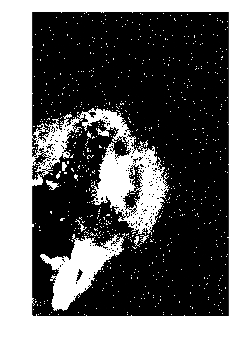

In [2]:
stdMap = norm.seriesStdev().pack()
image(stdMap > 0.05)

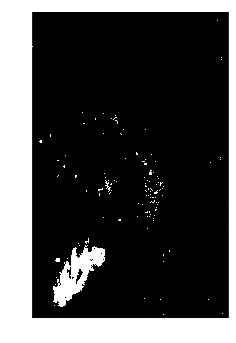

In [7]:
image(stdMap > 0.1)